<a href="https://colab.research.google.com/github/selyraa/2141720005-pcvk-2023/blob/main/week-05/JS05_Gamma_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kelompok 5
### Anggota Kelompok
1. Bima Bayu Saputra
2. Sely Ruli Amanda
3. Wildan Hafidz Mauludin

## TUGAS PRAKTIKUM

### 1. Buat Gamma Correction sesuai dengan petunjuk berikut

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


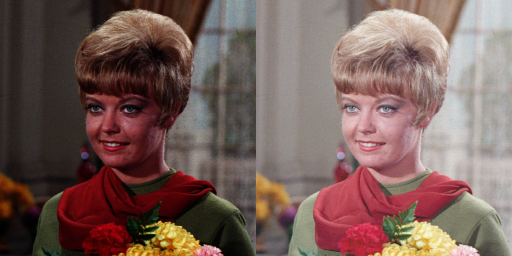

In [16]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

gamma_img = np.power(img / float(np.max(img)), 1/gamma) * 255.0
gamma_img = np.uint8(gamma_img)

final_frame = cv.hconcat((img, gamma_img))

cv2_imshow(final_frame)

### 2. Buat Simulasi Image Depth

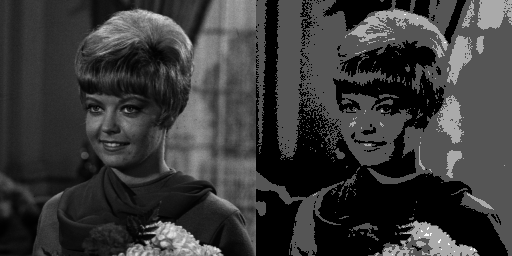

In [34]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    depth_image[y,x] = np.clip((np.round(img[y,x]/level)*level), 0, 255)
# C = np.round((img/level)*level)
final_frame = cv.hconcat((img, depth_image))
cv2_imshow(final_frame)

### 3. Buat modul Average Denoising

PSNR 5: 27.891683008592807 dB


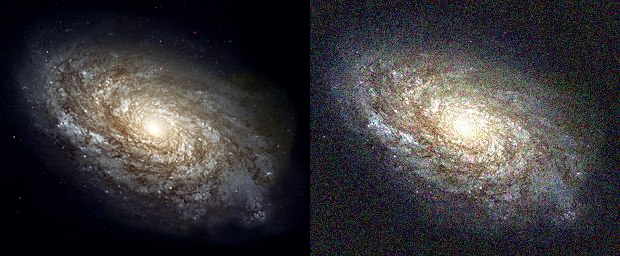

PSNR 10: 27.887438234969686 dB


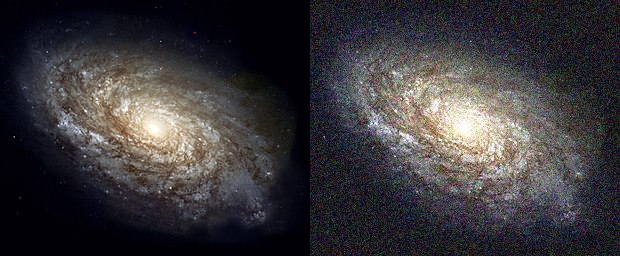

PSNR 20: 27.88091084402762 dB


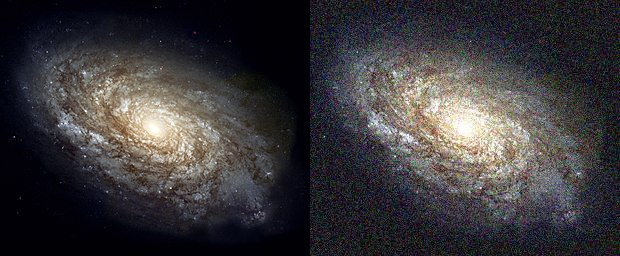

PSNR 40: 27.900612307821447 dB


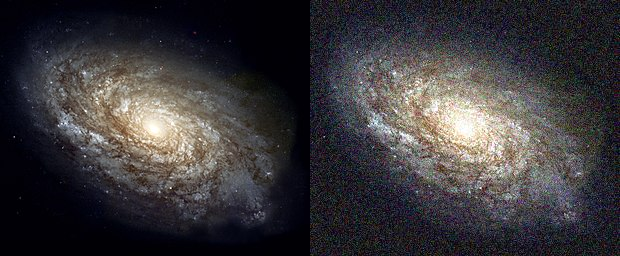

PSNR 80: 27.88139875781551 dB


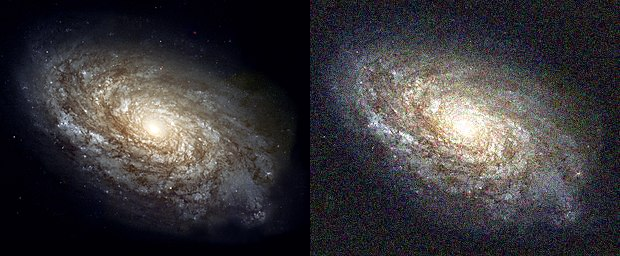

PSNR 100: 27.88158322520698 dB


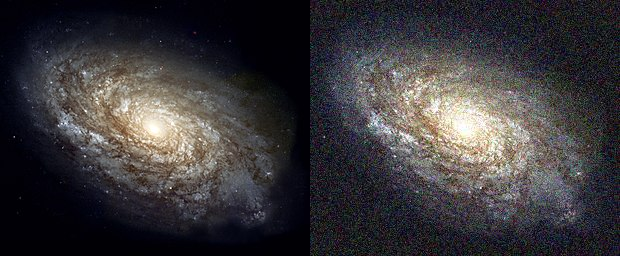

In [78]:
import cv2
import glob
from numpy import sqrt, log10

def PSNR(img, compressed):
    mse = np.mean((img - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# cv_img = []
# for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
#     n = cv.imread(img)
#     cv_img.append(n)

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')  # Ganti 'original.jpg' dengan nama citra referensi yang benar

list_img = [5, 10, 20, 40, 80, 100]
for index, img in enumerate(list_img):
  noise = cv.imread(f'/content/drive/MyDrive/PCVK/Images/noises/{img}.jpg')
  psnr = PSNR(original, noise)
  print(f"PSNR {img}: {psnr} dB")
  final_frame = cv.hconcat((original, noise))
  cv2_imshow(final_frame)

### 4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP),sedangkan image paling kanan adalah hasilnya:

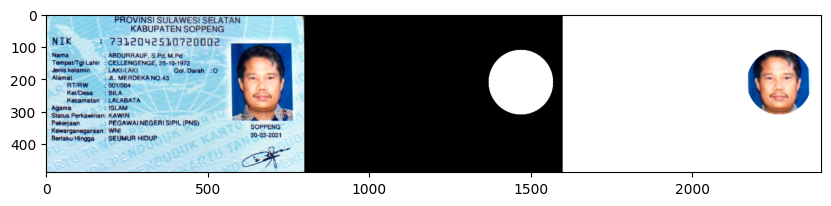

In [114]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg'), cv.COLOR_BGR2RGB)

center1 = (670, 210)
radius1 = 100
# center2 = (735, 218)
# radius2 = 32

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
# cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_and(~original_image, mask)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, ~masked_image))
plt.imshow(final_frame)
plt.show()

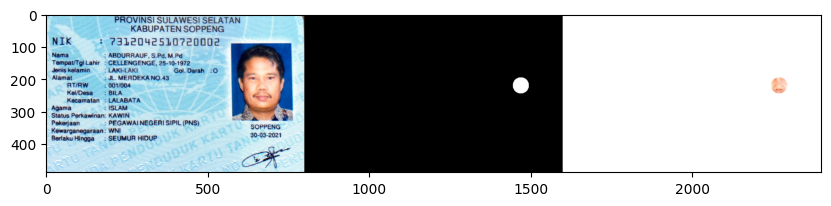

In [119]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg'), cv.COLOR_BGR2RGB)

center1 = (670, 220)
radius1 = 25
# center2 = (735, 218)
# radius2 = 32

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
# cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_and(~original_image, mask)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, ~masked_image))
plt.imshow(final_frame)
plt.show()

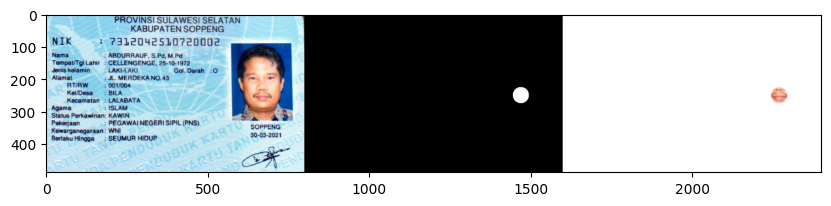

In [121]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg'), cv.COLOR_BGR2RGB)

center1 = (670, 250)
radius1 = 25
# center2 = (735, 218)
# radius2 = 32

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
# cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_and(~original_image, mask)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, ~masked_image))
plt.imshow(final_frame)
plt.show()

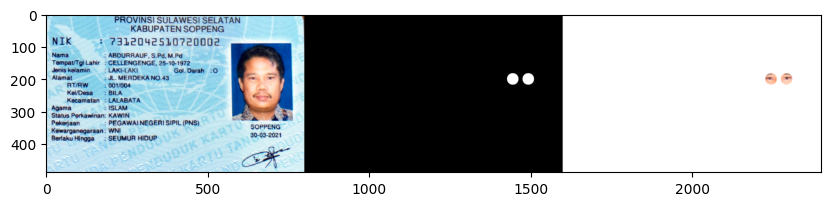

In [130]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg'), cv.COLOR_BGR2RGB)

center1 = (645, 200)
radius1 = 18
center2 = (693, 200)
radius2 = 18

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_and(~original_image, mask)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, ~masked_image))
plt.imshow(final_frame)
plt.show()

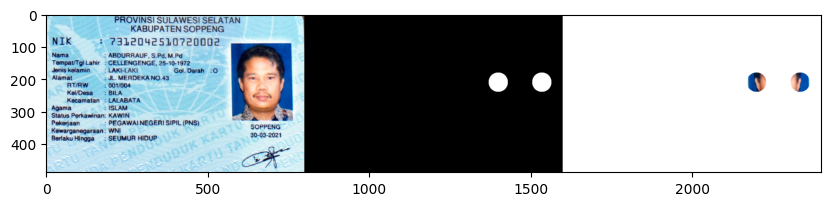

In [136]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg'), cv.COLOR_BGR2RGB)

center1 = (600, 210)
radius1 = 30
center2 = (735, 210)
radius2 = 30

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_and(~original_image, mask)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, ~masked_image))
plt.imshow(final_frame)
plt.show()

### 5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

### NOT (komplemen)

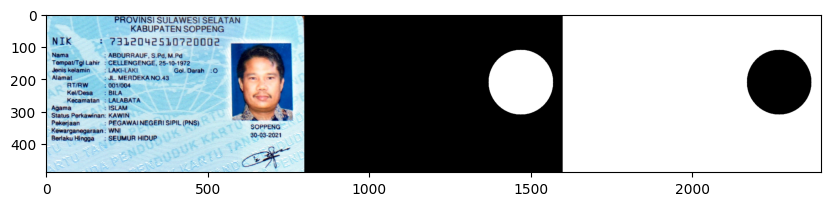

In [144]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg'), cv.COLOR_BGR2RGB)

center1 = (670, 210)
radius1 = 100
# center2 = (735, 218)
# radius2 = 32

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
# cv.circle(mask, center2, radius2, (255, 255, 255), -1)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, ~mask))
plt.imshow(final_frame)
plt.show()

### OR (Atau)

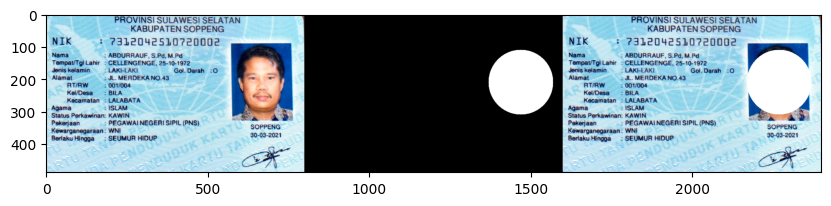

In [146]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg'), cv.COLOR_BGR2RGB)

center1 = (670, 210)
radius1 = 100
# center2 = (735, 218)
# radius2 = 32

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
# cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_or(original_image, mask)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, masked_image))
plt.imshow(final_frame)
plt.show()

### AND (Dan)

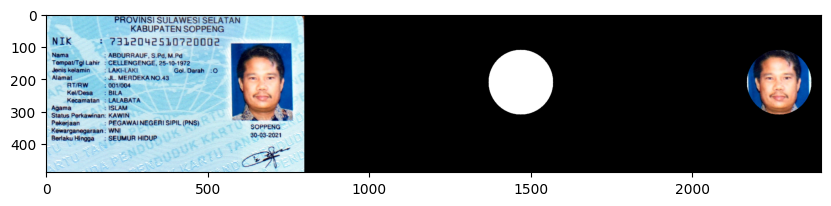

In [147]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg'), cv.COLOR_BGR2RGB)

center1 = (670, 210)
radius1 = 100
# center2 = (735, 218)
# radius2 = 32

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
# cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_and(original_image, mask)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, masked_image))
plt.imshow(final_frame)
plt.show()

### NAND (Not And)

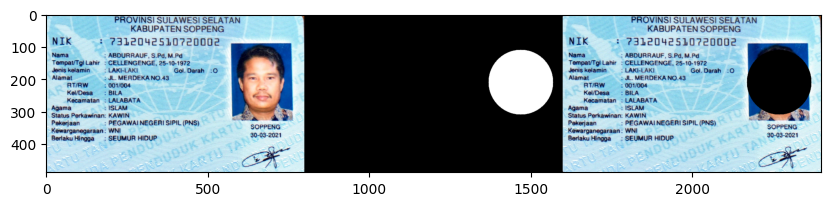

In [148]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg'), cv.COLOR_BGR2RGB)

center1 = (670, 210)
radius1 = 100
# center2 = (735, 218)
# radius2 = 32

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
# cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_and(original_image, ~mask)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, masked_image))
plt.imshow(final_frame)
plt.show()

### XOR (Exlusive Or)

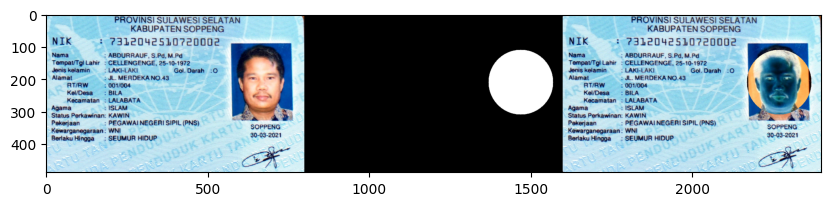

In [150]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg'), cv.COLOR_BGR2RGB)

center1 = (670, 210)
radius1 = 100
# center2 = (735, 218)
# radius2 = 32

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
# cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_xor(original_image, mask)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, masked_image))
plt.imshow(final_frame)
plt.show()